# 🏠 House Price Prediction using Linear Regression

**Internship Task 4: Regression Analysis**

In this task, we aim to build a linear regression model to predict house prices based on features such as size, number of rooms, and location.

## 📌 Step 1: Import Libraries
We begin by importing all necessary libraries required for data manipulation, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 📌 Step 2: Load and Explore Dataset
Load the dataset and explore its structure. We'll check for missing values, basic statistics, and visualize the distributions and potential outliers.

In [29]:
df = pd.read_csv("house_prices.csv")
df.head()

,Size,Location,Number of Rooms,Price
0,3215,urban,3,566838
1,2126,suburban,2,365425
2,2225,urban,1,385543
3,823,urban,2,189285
4,1717,urban,4,352771


In [30]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             100 non-null    int64 
 1   Location         100 non-null    object
 2   Number of Rooms  100 non-null    int64 
 3   Price            100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


,Size,Number of Rooms,Price
count,100.000000,100.000000,100.00000
mean,2060.890000,3.060000,368997.34000
std,788.977191,1.462114,121117.63945
min,807.000000,1.000000,157214.00000
25%,1400.500000,2.000000,271016.25000
50%,1972.500000,3.000000,364081.00000
75%,2680.750000,4.000000,464246.00000
max,3489.000000,5.000000,601973.00000


In [31]:
df.isnull().sum()

Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64

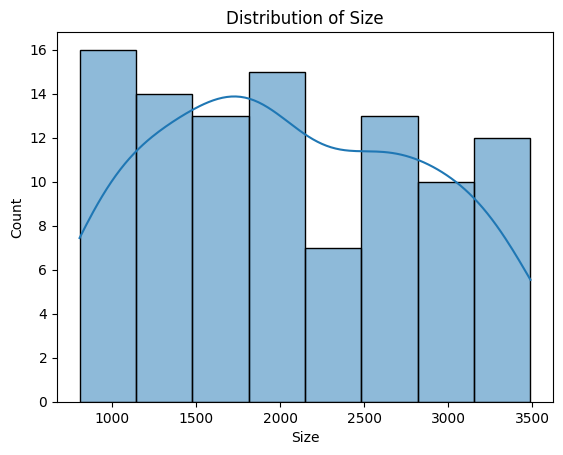

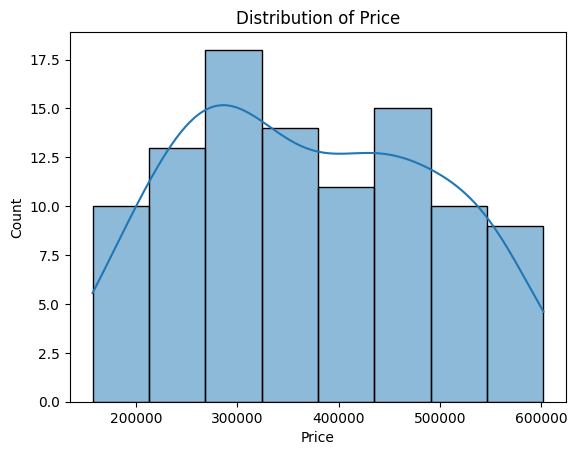

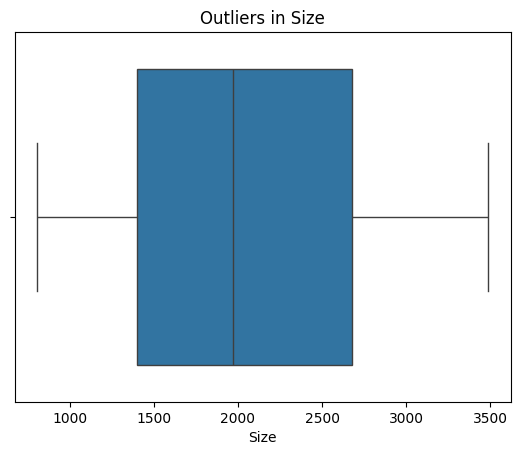

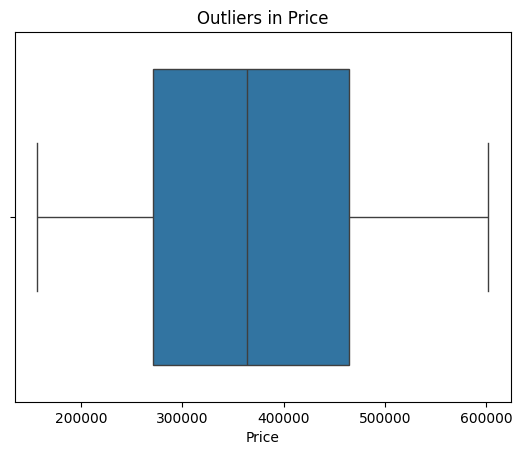

In [32]:
# Visualize distributions
sns.histplot(df['Size'], kde=True)
plt.title('Distribution of Size')
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Boxplots for outliers
sns.boxplot(x=df['Size'])
plt.title("Outliers in Size")
plt.show()

sns.boxplot(x=df['Price'])
plt.title("Outliers in Price")
plt.show()

## 📌 Step 3: Data Preprocessing
We clean the dataset by removing missing values and prepare it for modeling by scaling numerical features and encoding categorical variables.

In [33]:
# Drop missing values (or you can use fillna() if needed)
df.dropna(inplace=True)

In [34]:
X = df[['Size', 'Number of Rooms', 'Location']]
y = df['Price']

numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 📌 Step 4: Feature Correlation
Before encoding, we analyze the correlation between numerical features and the target variable (Price) using a heatmap.

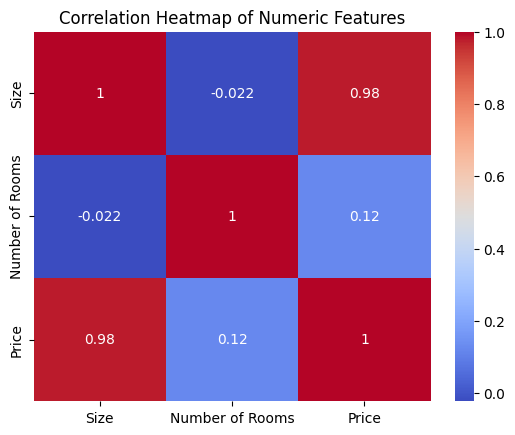

In [36]:
# Correlation heatmap (excluding encoded features)
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 📌 Step 5: Model Training
We split the data into training and testing sets, then train a linear regression model using a pipeline.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

## 📌 Step 6: Model Evaluation
Evaluate model performance using RMSE and R² metrics, and visualize actual vs. predicted prices.

In [38]:
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Root Mean Squared Error (RMSE): 5489.545764827636
R² Score: 0.9977376380996592


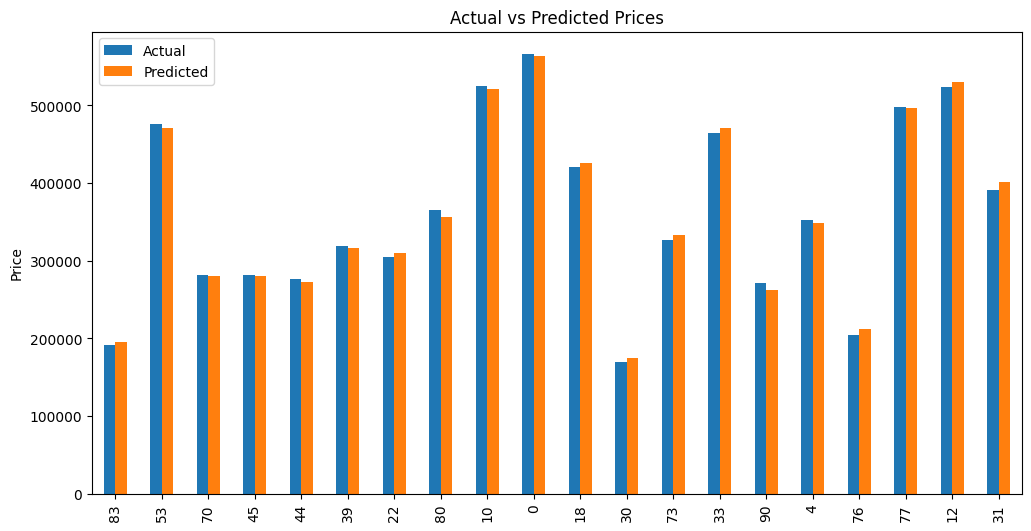

In [39]:
# Comparison of actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(20).plot(kind='bar', figsize=(12, 6))
plt.title("Actual vs Predicted Prices")
plt.ylabel("Price")
plt.show()

## 📌 Step 7: Feature Insights
Extract feature importances (coefficients) from the model to understand which features impact house prices the most.

In [42]:
regressor = model.named_steps['regressor']
coefficients = regressor.coef_

feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
0,num__Size,119799.52048
4,cat__Location_urban,20953.70602
1,num__Number of Rooms,14913.27939
3,cat__Location_suburban,-1790.97336
2,cat__Location_rural,-19162.73266


# Final Summary:

In this project, I built a linear regression model to predict house prices using a dataset containing features such as the size of the house, number of rooms, and location (urban, suburban, or rural). I started by loading and exploring the dataset, checking for any missing values and analyzing the distribution of the variables. Outliers were visualized using boxplots, and appropriate preprocessing steps were applied.

Numerical features were standardized, and the categorical Location feature was encoded using One-Hot Encoding. I then analyzed feature correlations and trained a linear regression model using an 80-20 train-test split. The model was evaluated using metrics such as Root Mean Square Error (RMSE) and R² Score, both of which indicated that the model performed reasonably well.

Finally, I analyzed the model coefficients to understand which features most strongly influenced house prices. The results showed that house size and location had the highest impact on price predictions. This project helped strengthen my understanding of regression modeling, data preprocessing, and evaluation techniques in data science.


